<a href="https://colab.research.google.com/github/abhi-jith23/Intrusion-Detection-System-using-DL/blob/main/FYP_IDS_NSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import keras
import sklearn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import sklearn.preprocessing
from scipy.stats import zscore
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics
from sklearn import svm, datasets
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebook/KDDTrain+.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
qp = pd.read_csv('drive/MyDrive/Colab Notebook/KDDTest+.txt', header=None)
qp.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
lst_names = df.columns # column names
lst_names


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [ ]:
testlst_names = qp.columns
testlst_names

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [ ]:
df = df.drop('difficulty_level', 1)
df.shape

(125973, 42)

In [ ]:
qp = qp.drop('difficulty_level', 1)
qp.shape

(22544, 42)

In [ ]:
df.isnull().values.any()

False

In [ ]:
qp.isnull().values.any()

False

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig('1')
    plt.show()

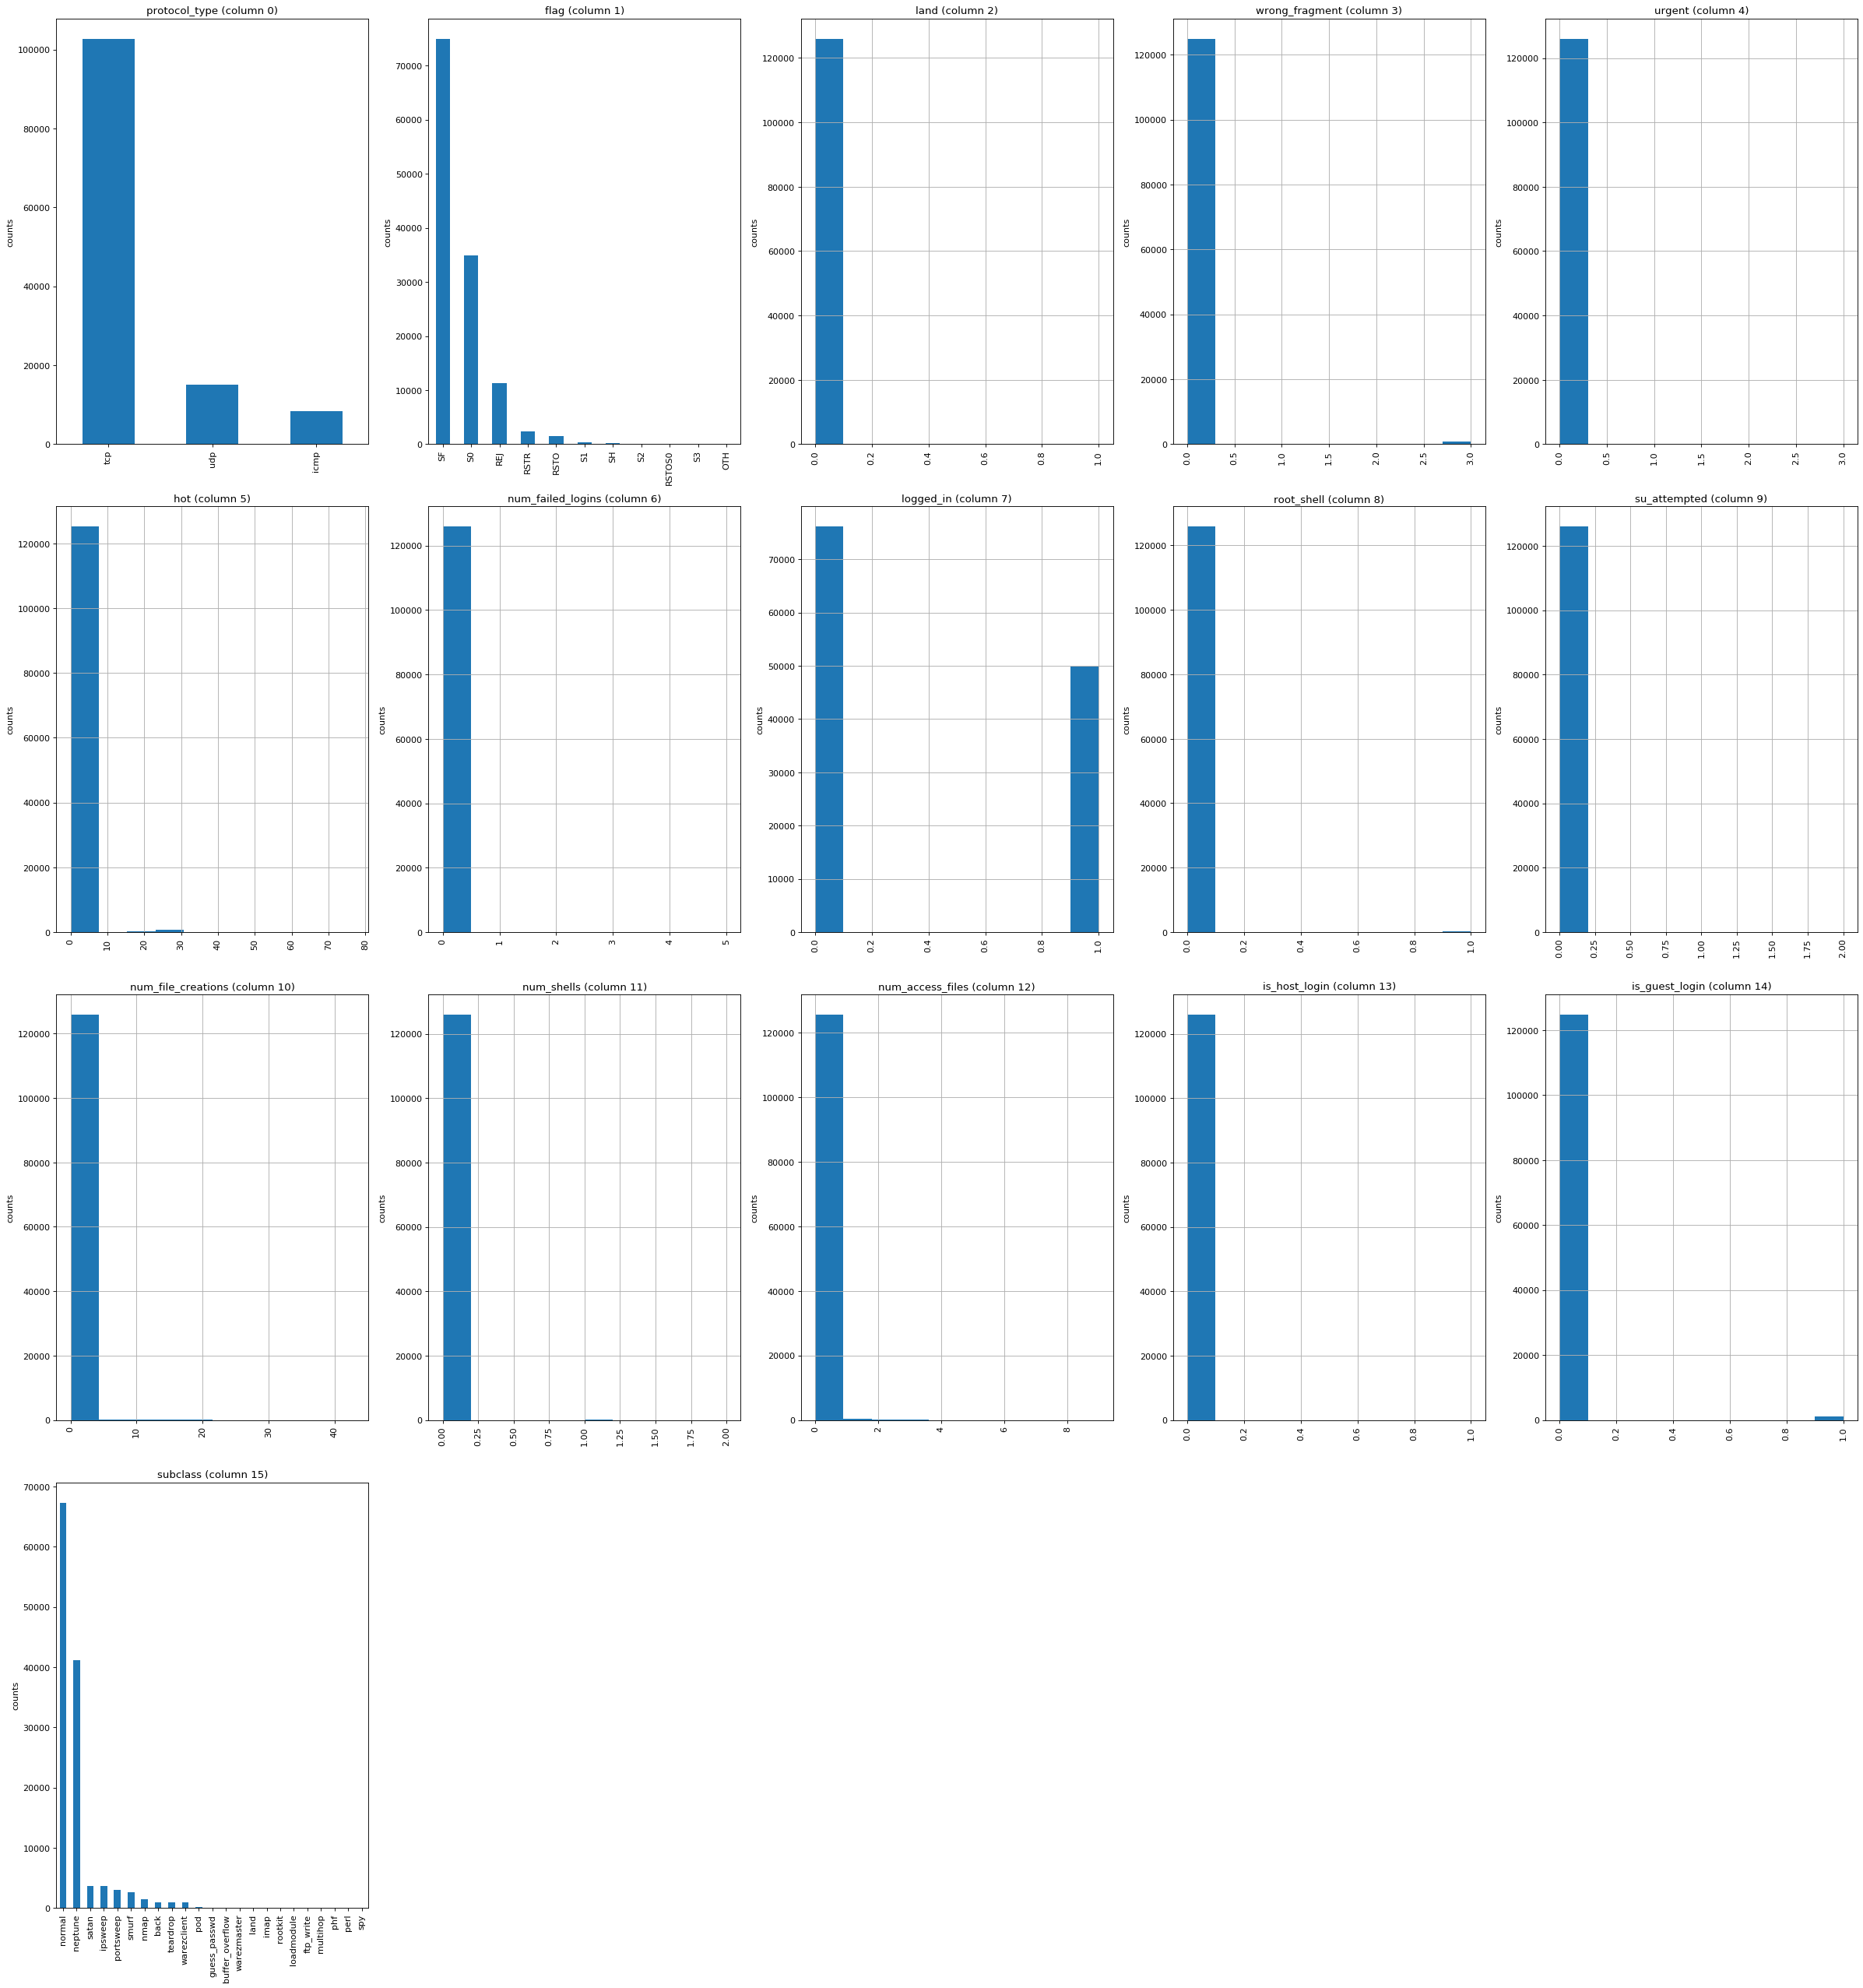

In [ ]:
plotPerColumnDistribution(df, 25, 5)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for NSL-KDD Train', fontsize=15)
    plt.savefig('2')
    plt.show()

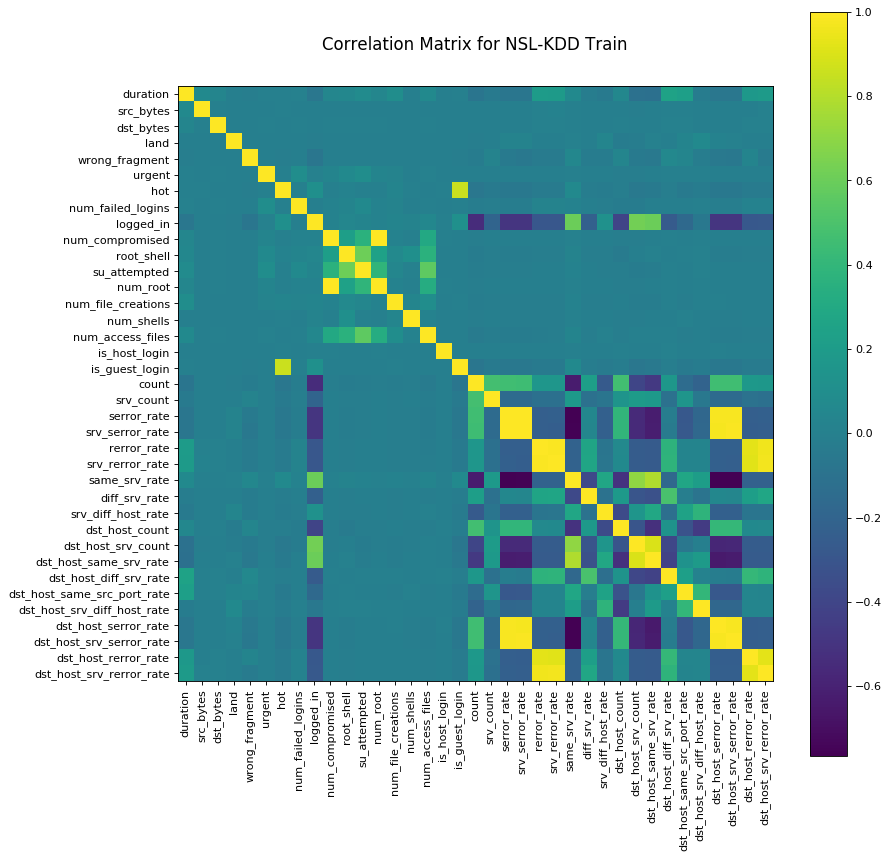

In [ ]:
plotCorrelationMatrix(df, 12)

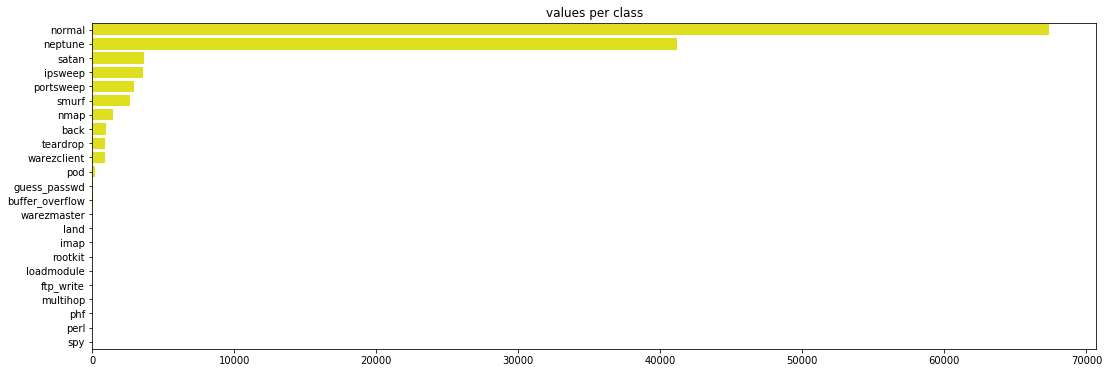

In [ ]:
label_counts = df['subclass'].value_counts()
plt.figure(figsize=(18,6));
sns.barplot(y=label_counts.index, x=label_counts.values, color='Yellow');
plt.title('values per class');
plt.savefig('3')
# display(label_counts)

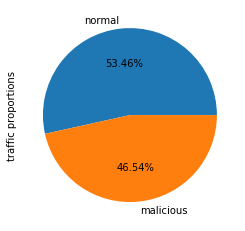

In [ ]:
#binary traffic proportions
binary_class = []
for label in df['subclass']:
    if label !='normal':
        binary_class.append('malicious')
    else:
        binary_class.append('normal')
binary_class = pd.Series(binary_class)
plt.figure()
binary_class.value_counts().plot(kind='pie', label='traffic proportions', autopct='%.2f%%' )
plt.savefig('4')
plt.show()

In [ ]:
attack_vs_protocol = pd.crosstab(df.subclass, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
subclass,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [ ]:
# Multiple Charts - Helper Function
def pie_charts(data_list,labels,name):
    list_length = len(data_list)
    
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    for count, data_set in enumerate(data_list): 

        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))

        axs[count].set_title(labels[count])
        plt.savefig(name)
        
    return axs

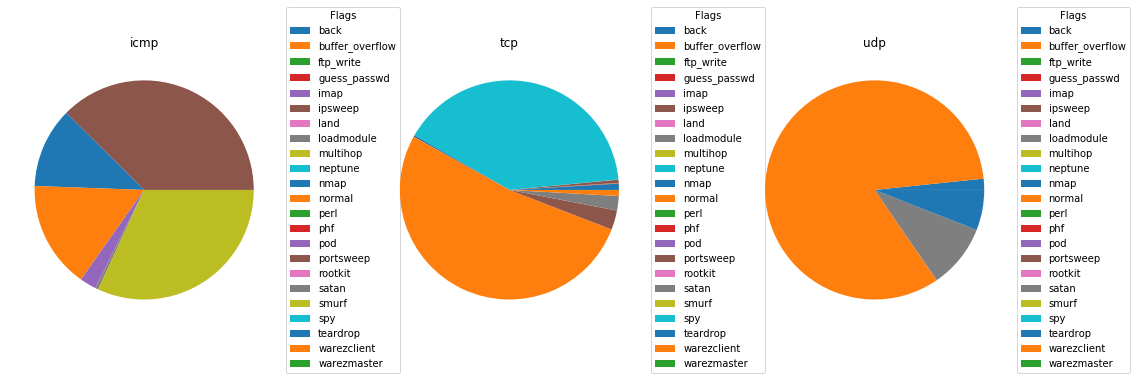

In [ ]:
# series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

pie_charts([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'], '5')
plt.show()

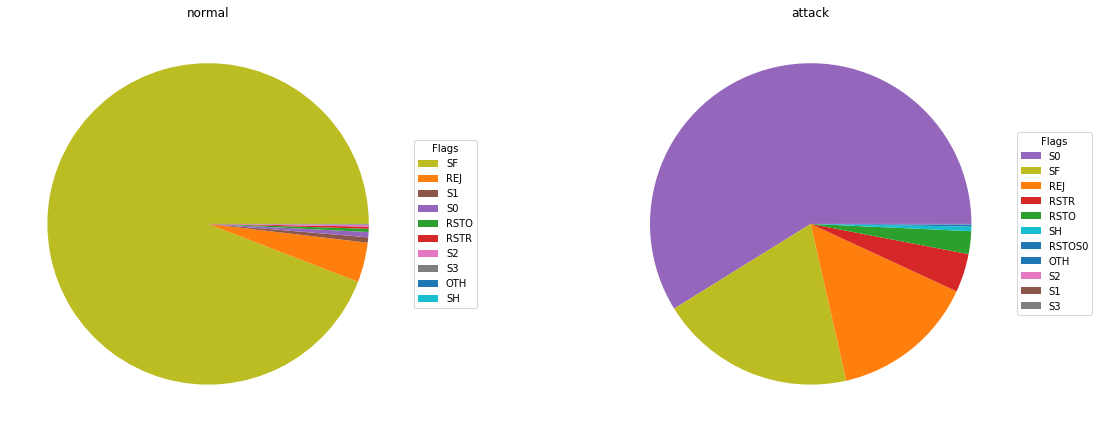

In [ ]:
# Normal - 0, Attacks - 1
is_attack = df.subclass.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = is_attack

# count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

flag_axs = pie_charts([normal_flags, attack_flags], ['normal','attack'], '6')        
plt.show()

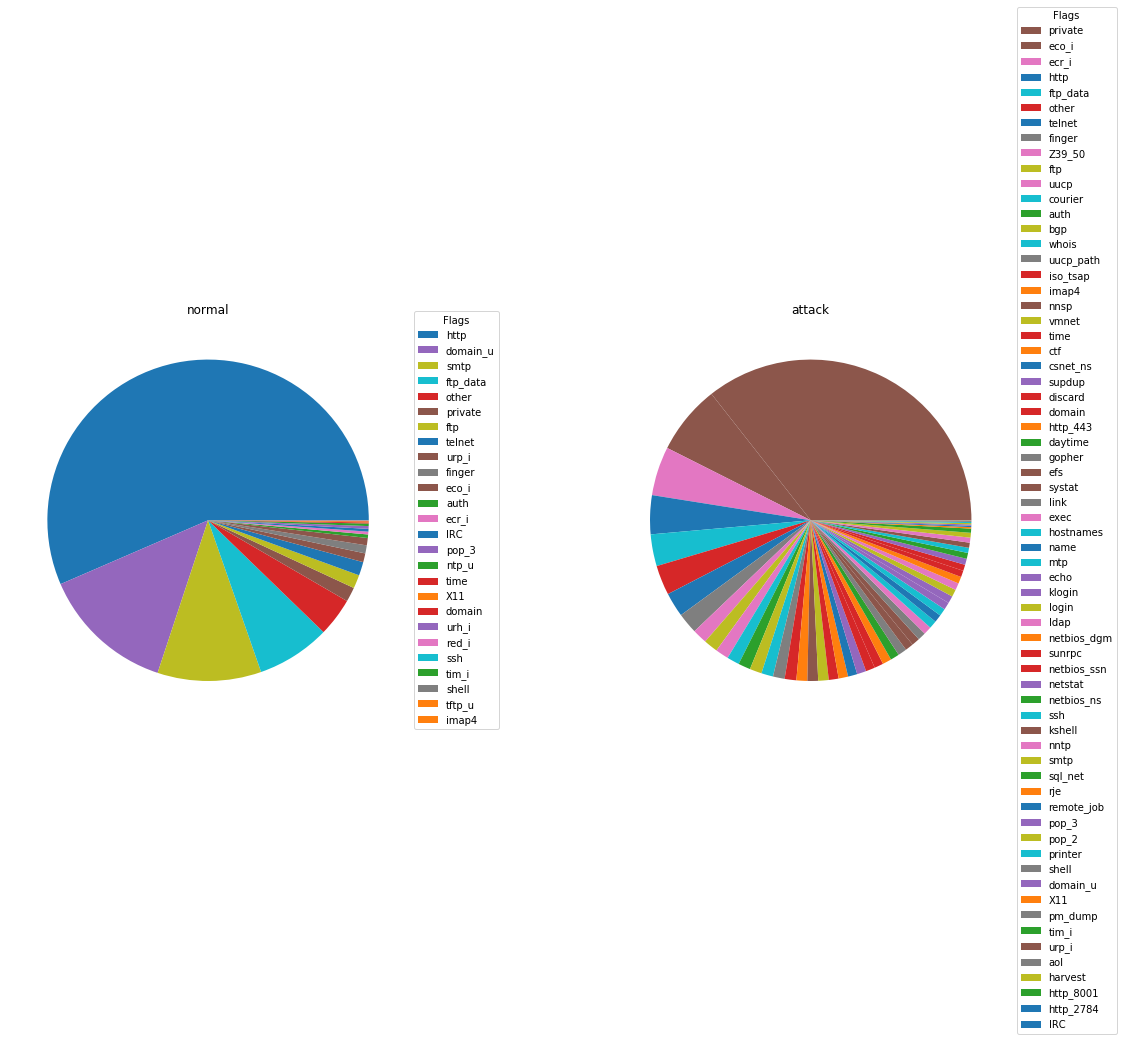

In [ ]:
# count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

service_axs = pie_charts([normal_services, attack_services], ['normal','attack'], '7')        
plt.show()

In [ ]:
df = df.drop('attack_flag', axis = 1)
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass'],
      dtype='object')

In [ ]:
cols = ['protocol_type','service','flag']
cols

['protocol_type', 'service', 'flag']

In [ ]:
#One-hot encoding
def one_hot(df, cols):
    
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df


In [ ]:
combined_data = pd.concat([df,qp])

In [ ]:
combined_data = one_hot(combined_data,cols)

In [ ]:
def normalize(df, cols):
    
    result = df.copy() 
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
tmp = combined_data.pop('subclass')

In [ ]:
new_train_df = normalize(combined_data,combined_data.columns)
new_train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount=0
ProbeCount=0
U2RCount=0
R2LCount=0
NormalCount=0

for item in tmp:
    if item in check1:
        classlist.append("DoS")
        DoSCount=DoSCount+1
    elif item in check2:
        classlist.append("Probe")
        ProbeCount=ProbeCount+1
    elif item in check3:
        classlist.append("U2R")
        U2RCount=U2RCount+1
    elif item in check4:
        classlist.append("R2L")
        R2LCount=R2LCount+1
    else:
        classlist.append("Normal")
        NormalCount=NormalCount+1   

In [ ]:
new_train_df["Class"] = classlist
new_train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
22540,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
22541,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DoS
22542,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal


In [ ]:
new_train_df["Class"].value_counts()

Normal    77232
DoS       53387
Probe     14077
R2L        3702
U2R         119
Name: Class, dtype: int64

In [ ]:
new_train_df.isnull().values.any()

False

In [ ]:
y_train=new_train_df["Class"]
y_train

0        Normal
1        Normal
2           DoS
3        Normal
4        Normal
          ...  
22539    Normal
22540    Normal
22541       DoS
22542    Normal
22543     Probe
Name: Class, Length: 148517, dtype: object

In [ ]:
y_train.isnull().values.any()

False

In [ ]:
combined_data_X = new_train_df.drop('Class', 1)
combined_data_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
batch_size = 32
model = Sequential()
model.add(Convolution1D(64, kernel_size=122, border_mode="same",activation="relu",input_shape=(122, 1)))
model.add(MaxPooling1D(pool_length=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False))) 
model.add(Reshape((128, 1), input_shape = (128, )))
    
model.add(MaxPooling1D(pool_length=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False))) 
    
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
for layer in model.layers:
    print(layer.output_shape)

(None, 122, 64)
(None, 24, 64)
(None, 24, 64)
(None, 128)
(None, 128, 1)
(None, 25, 1)
(None, 25, 1)
(None, 256)
(None, 256)
(None, 5)
(None, 5)


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 122, 64)           7872      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 64)            256       
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               66048     
_________________________________________________________________
reshape_5 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 25, 1)             0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 25, 1)             4         
__________

In [ ]:
oos_pred = []
k_dict = {'accuracy' : [], 'detectionRate' : [], 'falsepositiverate' : [], 'confusionmatrix' : []}

In [ ]:
for k in range(2,11,2):
    k_dict['accuracy'].append([])
    k_dict['confusionmatrix'].append([])
    kfold = StratifiedKFold(n_splits=k,shuffle=True,random_state=42)
    kfold.get_n_splits(combined_data_X,y_train)
    for train_index, test_index in kfold.split(combined_data_X,y_train):
        train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
    
    
        x_columns_train = new_train_df.columns.drop('Class')
        x_train_array = train_X[x_columns_train].values
        x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    
        dummies = pd.get_dummies(train_y)
        outcomes = dummies.columns
        num_classes = len(outcomes)
        y_train_1 = dummies.values
    
        x_columns_test = new_train_df.columns.drop('Class')
        x_test_array = test_X[x_columns_test].values
        x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    
        dummies_test = pd.get_dummies(test_y)
        outcomes_test = dummies_test.columns
        num_classes = len(outcomes_test)
        y_test_2 = dummies_test.values
    
   
        model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=5)
    
        pred = model.predict(x_test_2)
        pred = np.argmax(pred,axis=1)
        y_eval = np.argmax(y_test_2,axis=1)
        score = metrics.accuracy_score(y_eval, pred)
        k_dict['accuracy'][-1].append(score)
        cm = confusion_matrix(y_eval, pred, labels=[0,1,2,3,4])
        k_dict['confusionmatrix'][-1].append(cm)
        print("Validation score: {}".format(score))
    

Train on 74258 samples, validate on 74259 samples
Epoch 1/5
74258/74258 [==============================] - 148s 2ms/step - loss: 0.1341 - acc: 0.9581 - val_loss: 0.0865 - val_acc: 0.9745
Epoch 2/5
74258/74258 [==============================] - 145s 2ms/step - loss: 0.0824 - acc: 0.9731 - val_loss: 0.0757 - val_acc: 0.9767
Epoch 3/5
74258/74258 [==============================] - 152s 2ms/step - loss: 0.0674 - acc: 0.9776 - val_loss: 0.0525 - val_acc: 0.9808
Epoch 4/5
74258/74258 [==============================] - 155s 2ms/step - loss: 0.0532 - acc: 0.9814 - val_loss: 0.0521 - val_acc: 0.9817
Epoch 5/5
74258/74258 [==============================] - 158s 2ms/step - loss: 0.0459 - acc: 0.9834 - val_loss: 0.0427 - val_acc: 0.9846
Validation score: 0.9846483254555003
Train on 74259 samples, validate on 74258 samples
Epoch 1/5
74259/74259 [==============================] - 164s 2ms/step - loss: 0.0447 - acc: 0.9853 - val_loss: 0.0384 - val_acc: 0.9864
Epoch 2/5
74259/74259 [==================

133665/133665 [==============================] - 253s 2ms/step - loss: 0.0132 - acc: 0.9951 - val_loss: 0.0140 - val_acc: 0.9945
Validation score: 0.9944788580662537
Train on 133665 samples, validate on 14852 samples
Epoch 1/5
133665/133665 [==============================] - 253s 2ms/step - loss: 0.0133 - acc: 0.9950 - val_loss: 0.0121 - val_acc: 0.9958
Epoch 2/5
133665/133665 [==============================] - 254s 2ms/step - loss: 0.0129 - acc: 0.9950 - val_loss: 0.0128 - val_acc: 0.9952
Epoch 3/5
133665/133665 [==============================] - 253s 2ms/step - loss: 0.0135 - acc: 0.9951 - val_loss: 0.0117 - val_acc: 0.9958
Epoch 4/5
133665/133665 [==============================] - 254s 2ms/step - loss: 0.0131 - acc: 0.9951 - val_loss: 0.0123 - val_acc: 0.9958
Epoch 5/5
133665/133665 [==============================] - 254s 2ms/step - loss: 0.0130 - acc: 0.9951 - val_loss: 0.0171 - val_acc: 0.9941
Validation score: 0.9941422030702936
Train on 133665 samples, validate on 14852 samples


In [ ]:
accuracy = []
for k_acc in k_dict['accuracy']:
    accuracy.append(max(k_acc))

In [ ]:
f1_scores = []
for k_mat in k_dict['confusionmatrix']:
    f1_scores.append([])
    for i in range(len(k_mat)):
        f1 = []
        for j in range(5):
            pr = (k_mat[i][j][j])/sum(k_mat[i][j])
            s = 0
            for m in range(5):
                s+=k_mat[i][m][j]
            re = (k_mat[i][j][j])/s
            score = (2 * pr * re)/ (pr + re)
            f1.append(score)
        f1_scores[-1].extend(f1)


class_f1_scores = []
k = 2
for i in range(5):
    class_f1_scores.append([])
    for j in range(5):
        s = sum(f1_scores[i][j::5])
        class_f1_scores[-1].append(s/k)
    k+=2
            
          

In [ ]:
false_positive_rate = []
detection_rate = []
for k_mat in k_dict['confusionmatrix']:
    false_positive_rate.append([])
    detection_rate.append([])
    for i in range(len(k_mat)):
        FP = k_mat[i].sum(axis=0) - np.diag(k_mat[i])  
        FN = k_mat[i].sum(axis=1) - np.diag(k_mat[i])
        TP = np.diag(k_mat[i])
        TN = k_mat[i].sum() - (FP + FN + TP)
        
        FPR = sum(FP)/sum(FP+TN)
        DR = sum(TP)/sum(TP + FP)
        false_positive_rate[-1].append(FPR)
        detection_rate[-1].append(DR)
        
    false_positive_rate[-1] = np.mean(false_positive_rate[-1])*100
    detection_rate[-1] = np.mean(detection_rate[-1])


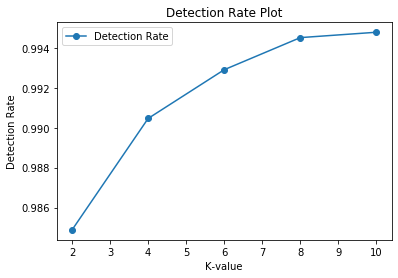

In [ ]:
# Detection Rate Plot
k_vals = [2,4,6,8,10]
plt.figure()
plt.plot(k_vals, detection_rate, marker='o', label = 'Detection Rate')
plt.title('Detection Rate Plot')
plt.xlabel('K-value')
plt.ylabel('Detection Rate')
plt.legend()
plt.savefig('Detection Rate Plot')
plt.show()

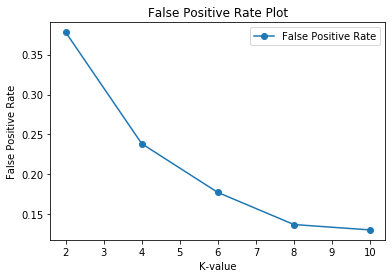

In [ ]:
# False Positive Rate Plot
plt.figure()
plt.plot(k_vals, false_positive_rate, marker='o', label = 'False Positive Rate')
plt.title('False Positive Rate Plot')
plt.xlabel('K-value')
plt.ylabel('False Positive Rate')
plt.legend()
plt.savefig('False Positive Rate Plot')
plt.show()

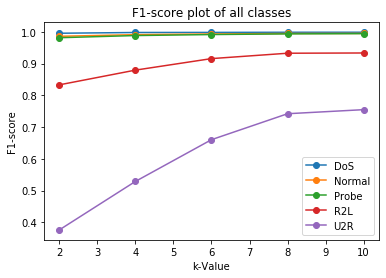

In [ ]:
# F1 Score plot of all classes
DoS_F1, Normal_F1, Probe_F1, R2L_F1, U2R_F1 = [], [], [], [], []
for i in range(5):
    DoS_F1.append(class_f1_scores[i][0])
    Normal_F1.append(class_f1_scores[i][1])
    Probe_F1.append(class_f1_scores[i][2])
    R2L_F1.append(class_f1_scores[i][3])
    U2R_F1.append(class_f1_scores[i][4])

plt.figure()
plt.plot(k_vals, DoS_F1, marker='o', label = 'DoS')
plt.plot(k_vals, Normal_F1, marker='o', label = 'Normal')
plt.plot(k_vals, Probe_F1, marker='o', label = 'Probe')
plt.plot(k_vals, R2L_F1, marker='o', label = 'R2L')
plt.plot(k_vals, U2R_F1, marker='o', label = 'U2R')
plt.title('F1-score plot of all classes')
plt.xlabel('k-Value')
plt.ylabel('F1-score')
plt.legend()
plt.savefig('F1-score Plot')
plt.show()

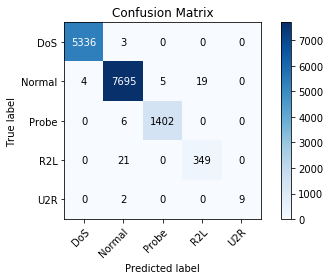

In [ ]:
# Confusion Matrix Plot
class_names = ["DoS","Normal","Probe","R2L","U2R"]
cmap=plt.cm.Blues
cm = k_dict['confusionmatrix'][4][7]
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]), ha="center", va="center", 
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.savefig('Confusion Matrix')
plt.show()

np.set_printoptions(precision=2)

In [ ]:
# Table of Multiclass Classification Results
d = [['2', accuracy[0], detection_rate[0], false_positive_rate[0]], ['4', accuracy[1], detection_rate[1], false_positive_rate[1]], ['6', accuracy[2], detection_rate[2], false_positive_rate[2]], ['8', accuracy[3], detection_rate[3], false_positive_rate[3]], ['10', accuracy[4], detection_rate[4], false_positive_rate[4]], ['Average', np.mean(accuracy), np.mean(detection_rate), np.mean(false_positive_rate)]]
tab = pd.DataFrame(d,columns = ['K-value','Accuracy%','Detection Rate%','False Positive Rate%'])
tab

,K-value,Accuracy%,Detection Rate%,False Positive Rate%
0,2,0.985106,0.984877,0.378071
1,4,0.991220,0.990466,0.238356
2,6,0.993536,0.992910,0.177252
3,8,0.995529,0.994519,0.137021
4,10,0.995960,0.994788,0.130288
5,Average,0.992270,0.991512,0.212198


In [ ]:
trainingdata = new_train_df.values
X_train = trainingdata[:125973,:-1]
Y_train = trainingdata[:125973,-1]

In [ ]:
X_test = trainingdata[125973:,:-1]
Y_test = trainingdata[125973:,-1]

In [ ]:
#PLA
clf = Perceptron (tol=1e-3)
clf.fit(X_train, Y_train)
train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
y_pred = clf.predict(X_test) 
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9744310288712661
Testing accuracy is: 0.7697835344215755


In [ ]:
PLA_f1score = f1_score(Y_test, y_pred, average="macro")
PLA_precision = precision_score(Y_test, y_pred, average="macro")
PLA_recall = recall_score(Y_test, y_pred, average="macro")
PLA_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#Logistic Regression
clf = LogisticRegression (solver='liblinear', multi_class='auto')
clf.fit(X_train, Y_train)
train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test) 
y_pred = clf.predict(X_test)
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9762885697728878
Testing accuracy is: 0.7499556422995032


In [ ]:
Logistic_f1 = f1_score(Y_test, y_pred, average="macro")
Logistic_precision = precision_score(Y_test, y_pred, average="macro")
Logistic_recall = recall_score(Y_test, y_pred, average="macro")
Logistic_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#Neural Network
clf = MLPClassifier (hidden_layer_sizes =(4,6,8))
clf = MLPClassifier (hidden_layer_sizes =(200,))
clf.fit(X_train, Y_train) 
train_acc = clf.score(X_train, Y_train) 
test_acc = clf.score(X_test, Y_test) 
y_pred = clf.predict(X_test)
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9980075095456963
Testing accuracy is: 0.8090844570617459


In [ ]:
Neural_f1 = f1_score(Y_test, y_pred, average="macro")
Neural_precision = precision_score(Y_test, y_pred, average="macro")
Neural_recall = recall_score(Y_test, y_pred, average="macro")
Neural_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
train_acc = clf.score(X_train, Y_train) 
test_acc = clf.score(X_test, Y_test)
y_pred = clf.predict(X_test) 
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.999833297611393
Testing accuracy is: 0.7652146912704045


In [ ]:
Tree_f1 = f1_score(Y_test, y_pred, average="macro")
Tree_precision = precision_score(Y_test, y_pred, average="macro")
Tree_recall = recall_score(Y_test, y_pred, average="macro")
Tree_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#Uniform Aggregation for PLA, logistic regression, NN and decision trees
clf1 = Perceptron (tol=1e-3)
clf2 = LogisticRegression (solver='liblinear', multi_class='auto')
clf3 = MLPClassifier (hidden_layer_sizes =(4,6,8))
clf4 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('PLA', clf1), ('LR', clf2), ('NN', clf3),('Tree',clf4)], voting='hard')
eclf1 = eclf1.fit(X_train,Y_train)
train_acc = eclf1.score(X_train, Y_train) 
test_acc = eclf1.score(X_test, Y_test)
y_pred = eclf1.predict(X_test) 
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)


Training accuracy is: 0.9898787835488557
Testing accuracy is: 0.7648598296664301


In [ ]:
Uniform_f1 = f1_score(Y_test, y_pred, average="macro")
Uniform_precision = precision_score(Y_test, y_pred, average="macro")
Uniform_recall = recall_score(Y_test, y_pred, average="macro")
Uniform_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#Bagging with PLA
PLA_clf = Perceptron (tol=1e-3)

clf = BaggingClassifier(base_estimator = PLA_clf)
clf = clf.fit(X_train,Y_train)
train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
y_pred = clf.predict(X_test) 
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.978130234256547
Testing accuracy is: 0.7507540809084458


In [ ]:
Bagging_f1 = f1_score(Y_test, y_pred, average="macro")
Bagging_precision = precision_score(Y_test, y_pred, average="macro")
Bagging_recall = recall_score(Y_test, y_pred, average="macro")
Bagging_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#AdaBoost with decision tree 
decision_clf = DecisionTreeClassifier()
clf = AdaBoostClassifier(decision_clf)
clf.fit(X_train,Y_train)
train_acc = clf.score(X_train, Y_train) 
test_acc = clf.score(X_test, Y_test)
y_pred = clf.predict(X_test) 
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)


Training accuracy is: 0.999833297611393
Testing accuracy is: 0.7614886444286728


In [ ]:
Ada_f1 = f1_score(Y_test, y_pred, average="macro")
Ada_precision = precision_score(Y_test, y_pred, average="macro")
Ada_recall = recall_score(Y_test, y_pred, average="macro")
Ada_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
train_acc = clf.score(X_train, Y_train) 
test_acc = clf.score(X_test, Y_test)
y_pred = clf.predict(X_test)
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.999833297611393
Testing accuracy is: 0.7487136266855926


In [ ]:
RandomForest_f1 = f1_score(Y_test, y_pred, average="macro")
RandomForest_precision = precision_score(Y_test, y_pred, average="macro")
RandomForest_recall = recall_score(Y_test, y_pred, average="macro")
RandomForest_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
data = [["PLA",PLA_accuracy,PLA_precision,PLA_recall,PLA_f1score],["Logistic Regression",Logistic_accuracy,Logistic_precision,Logistic_recall,Logistic_f1],["NN",Neural_accuracy,Neural_precision,Neural_recall,Neural_f1],["DTree",Tree_accuracy,Tree_precision,Tree_recall,Tree_f1],["Voting",Uniform_accuracy,Uniform_precision,Uniform_recall,Uniform_f1],["Bagging of PLA",Bagging_accuracy,Bagging_precision,Bagging_recall,Bagging_f1],["AdaBoost",Ada_accuracy,Ada_precision,Ada_recall,Ada_f1],["Random Forest",RandomForest_accuracy,RandomForest_precision,RandomForest_recall,RandomForest_f1]]
rt = pd.DataFrame(data,columns = ['','Mean Acc','Mean Precision','Mean Recall','Mean F1'])
rt

,,Mean Acc,Mean Precision,Mean Recall,Mean F1
0,PLA,0.769784,0.750920,0.577282,0.593128
1,Logistic Regression,0.749956,0.665561,0.490451,0.483570
2,NN,0.809084,0.750800,0.622719,0.655025
3,DTree,0.765215,0.728301,0.544479,0.556670
4,Voting,0.764860,0.851480,0.509835,0.517197
5,Bagging of PLA,0.750754,0.696027,0.507112,0.523922
6,AdaBoost,0.761489,0.782096,0.509929,0.537895
7,Random Forest,0.748714,0.752554,0.479888,0.490832


In [ ]:
class_names = ["DoS","Normal","Probe","R2L","U2R"]

In [ ]:
classifier = Perceptron (tol=1e-3)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None,cmap=plt.cm.Blues):
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

 
    cm = confusion_matrix(y_true, y_pred)

   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)




Confusion matrix, without normalization
[[6161 1254   45    0    0]
 [ 103 9069  706    7    4]
 [ 123  336 1885   77    0]
 [   4 2466   12  220    5]
 [   1   40    2    5   19]]


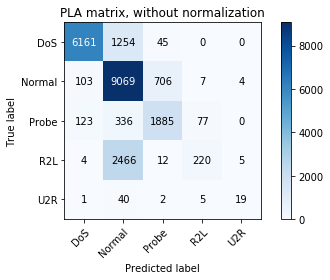

In [ ]:
#PLA confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='PLA matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[6068 1378   14    0    0]
 [  88 9190  608    2    1]
 [ 167  593 1633   28    0]
 [   3 2687    3   14    0]
 [   0   65    0    0    2]]


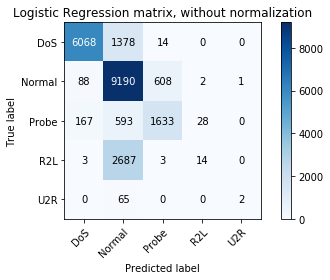

In [ ]:
#Logistic Regression Matrix
classifier = LogisticRegression (solver='liblinear', multi_class='auto')
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Logistic Regression matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[5943 1361  145   11    0]
 [  66 9490  329    4    0]
 [ 357  547 1516    1    0]
 [   0 2381   75  251    0]
 [   0   58    2    7    0]]


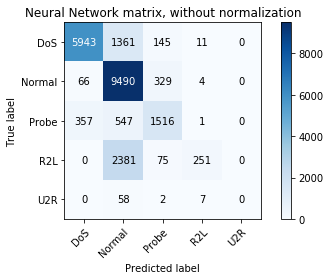

In [ ]:
#NN confusion matrix
classifier = MLPClassifier (hidden_layer_sizes =(4,6,8))
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Neural Network matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[6061 1298   46   55    0]
 [  69 9213  601    6    0]
 [ 255  321 1840    5    0]
 [   0 1830  522  344   11]
 [   0   46    0    6   15]]


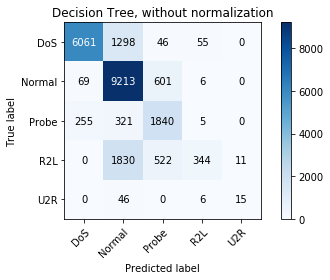

In [ ]:
#Confusion Matrix for decision tree
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Decision Tree, without normalization')
plt.show()

Confusion matrix, without normalization
[[6195 1258    7    0    0]
 [  88 9230  570    0    1]
 [ 178  538 1678   27    0]
 [   4 2495    2  206    0]
 [   1   56    0    3    7]]


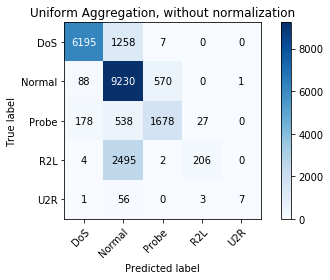

In [ ]:
classifier = VotingClassifier(estimators=[('PLA', clf1), ('LR', clf2), ('NN', clf3),('Tree',clf4)], voting='hard')
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Uniform Aggregation, without normalization')
plt.show()

Confusion matrix, without normalization
[[6083 1362   15    0    0]
 [ 176 9209  502    0    2]
 [ 153  596 1574   98    0]
 [   4 2684    3   15    1]
 [   0   64    0    1    2]]


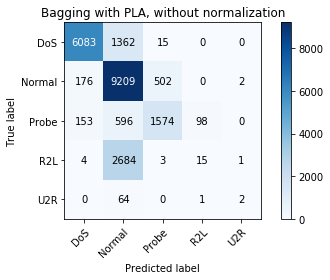

In [ ]:
#Bagging with PLA confusion matrix
classifier = BaggingClassifier(base_estimator = PLA_clf)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Bagging with PLA, without normalization')
plt.show()

Confusion matrix, without normalization
[[5847 1597   16    0    0]
 [  70 9617  199    1    2]
 [ 162  915 1344    0    0]
 [   0 2371    4  329    3]
 [   0   59    0    4    4]]


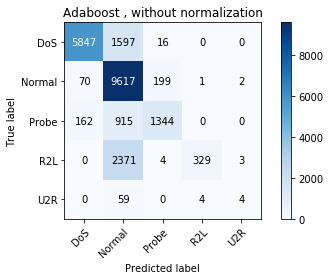

In [ ]:
#Adaboost Confusion matrix

classifier = AdaBoostClassifier(decision_clf)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Adaboost , without normalization')
plt.show()

Confusion matrix, without normalization
[[5888 1533   39    0    0]
 [  67 9634  185    1    2]
 [ 163  833 1425    0    0]
 [   0 2625    1   80    1]
 [   0   62    0    3    2]]


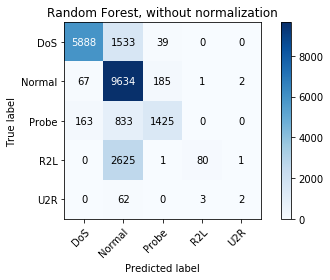

In [ ]:
#Random Forest Confusion matrix

classifier = RandomForestClassifier()
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Random Forest, without normalization')
plt.savefig('RFCM')
plt.show()